**step 1:**
The required libraries for working with data, performing machine learning tasks, and building the chatbot as described:

Import Libraries:

In [ ]:
# Data manipulation and loading
import pandas as pd

# For text vectorization and preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# For machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# TensorFlow for deep learning model (alternative option to Scikit-learn)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


Importing Files from Google Drive (for Google Colab)
Here’s how you can access files stored on Google Drive in Google Colab:

**Step 2**:
if you run the code in google colab

          Mount Google Drive
          First, you'll need to mount Google Drive so that you can access its contents.

**step 3:**  
Importing Files from Local System (in Jupyter or regular Python environment)

If you're working in a local environment and the datasets are stored on your local machine, you can directly use pandas to load the CSV files without needing to mount a drive.

In [ ]:
import pandas as pd

# Load datasets
orders_df = pd.read_csv('/olist_order_dataset/olist_orders_dataset.csv')
shipping_df = pd.read_csv('/olist_order_dataset/olist_order_items_dataset.csv')
payments_df = pd.read_csv('/olist_order_dataset/olist_order_payments_dataset.csv')
products_df = pd.read_csv('/olist_order_dataset/olist_products_dataset.csv')

# Display first few rows
print("Orders DataFrame:")
print(orders_df.head())

print("\nShipping DataFrame:")
print(shipping_df.head())

print("\nPayments DataFrame:")
print(payments_df.head())

print("\nProducts DataFrame:")
print(products_df.head())



Orders DataFrame:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00

**step 4:**   
    import the file for order details.    
merge the datasets and combine the four dataset
          

In [ ]:
import pandas as pd

# Load CSV files
orders_df = pd.read_csv('/olist_order_dataset/olist_orders_dataset.csv')
shipping_df = pd.read_csv('/olist_order_dataset/olist_order_items_dataset.csv')
payments_df = pd.read_csv('/olist_order_dataset/olist_order_payments_dataset.csv')
products_df = pd.read_csv('/olist_order_dataset/olist_products_dataset.csv')

# Merge steps
merged_df = pd.merge(orders_df, shipping_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, payments_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, products_df, on='product_id', how='left')

# Example clean_text function
def clean_text(text):
    if pd.isnull(text):
        return ""
    return text.lower().strip()

# Assume you want to clean product category names
merged_df['cleaned_query'] = merged_df['product_category_name'].apply(clean_text)

# Display cleaned data
print(merged_df[['order_id', 'product_category_name', 'cleaned_query']].head())



                           order_id  product_category_name  \
0  e481f51cbdc54678b7cc49136f2d6af7  utilidades_domesticas   
1  e481f51cbdc54678b7cc49136f2d6af7  utilidades_domesticas   
2  e481f51cbdc54678b7cc49136f2d6af7  utilidades_domesticas   
3  53cdb2fc8bc7dce0b6741e2150273451             perfumaria   
4  47770eb9100c2d0c44946d9cf07ec65d             automotivo   

           cleaned_query  
0  utilidades_domesticas  
1  utilidades_domesticas  
2  utilidades_domesticas  
3             perfumaria  
4             automotivo  


**step 5:**    
       

In [ ]:
from sklearn.model_selection import train_test_split

# Drop rows with missing target values
merged_df = merged_df.dropna(subset=['payment_type'])

# Define feature(s) and target
X = merged_df[['cleaned_query']]  # You can add more features here if needed
y = merged_df['payment_type']     # Target: e.g., 'credit_card', 'boleto', etc.

# For text features, you typically need to convert them into numeric format
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X['cleaned_query'])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Check shapes
print("Training Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)


Training Data Shape: (94744, 73)
Test Data Shape: (23687, 73)
Training Labels Shape: (94744,)
Test Labels Shape: (23687,)


**step 6:**   
logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 73.89%


**Step 7:**     
        Train the Model
Now, let's train a model using Logistic Regression or a neural network. We can follow the steps from your original code.

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X['cleaned_query'] = encoder.fit_transform(X['cleaned_query'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


<ipython-input-7-f318965e81e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cleaned_query'] = encoder.fit_transform(X['cleaned_query'])


Model Accuracy: 73.89%


**step 8:**  Basic Data Exploration

In [ ]:
# Import pandas library
import pandas as pd

# Load the initial datasets
shipping_df = pd.read_csv('/olist_order_dataset/olist_order_items_dataset.csv')
payments_df = pd.read_csv('/olist_order_dataset/olist_order_payments_dataset.csv')
products_df = pd.read_csv('/olist_order_dataset/olist_products_dataset.csv')
order_df = pd.read_csv('/olist_order_dataset/olist_orders_dataset.csv')

print(order_df.info())
print(order_df.describe(include='all'))
print(order_df.head())
print(order_df.isnull().sum())
print("Shipping Data Info:")
print(shipping_df.info())
print("\nPayments Data Info:")
print(payments_df.info())
print("\nProducts Data Info:")
print(products_df.info())
print("\nCustomers Data Info:")
print(customers_df.info())
print("\nGeolocation Data Info:")
print(geolocation_df.info())
print("\nSellers Data Info:")
print(sellers_df.info())
print("\nShipping Data Description:")
print(shipping_df.describe(include='all'))
print("\nPayments Data Description:")
print(payments_df.describe(include='all'))
print("\nProducts Data Description:")
print(products_df.describe(include='all'))
print("\nCustomers Data Description:")
print(customers_df.describe(include='all'))
print("\nGeolocation Data Description:")
print(geolocation_df.describe(include='all'))
print("\nSellers Data Description:")
print(sellers_df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441   
top     66dea50a8b16d9b

**step 9:**





**📊 1. Order Status Distribution (Top-Left Plot)**


What it shows: How many orders fall into each status (e.g., delivered, shipped, canceled).

Why it matters: You can quickly see if most orders are being delivered successfully or if there are issues like cancellations.

**⏱️ 2. Delivery Time Distribution (Top-Right Plot)**

What it shows: Histogram of how many days it takes from purchase to customer delivery.

Why it matters: Helps identify average shipping times, delays, and outliers (e.g., very long delivery times).

**💵 3. Freight Value vs Payment Value (Bottom-Left Plot)**

What it shows: A scatterplot comparing shipping (freight) cost to the total payment amount.

Why it matters: Helps identify cost inefficiencies — for example, orders where freight is disproportionately high relative to product cost.

**📦 4. Top Product Categories (Bottom-Right Plot)**

What it shows: The 10 most frequently ordered product categories.

Why it matters: Identifies best-selling product types and informs inventory or marketing strategy.

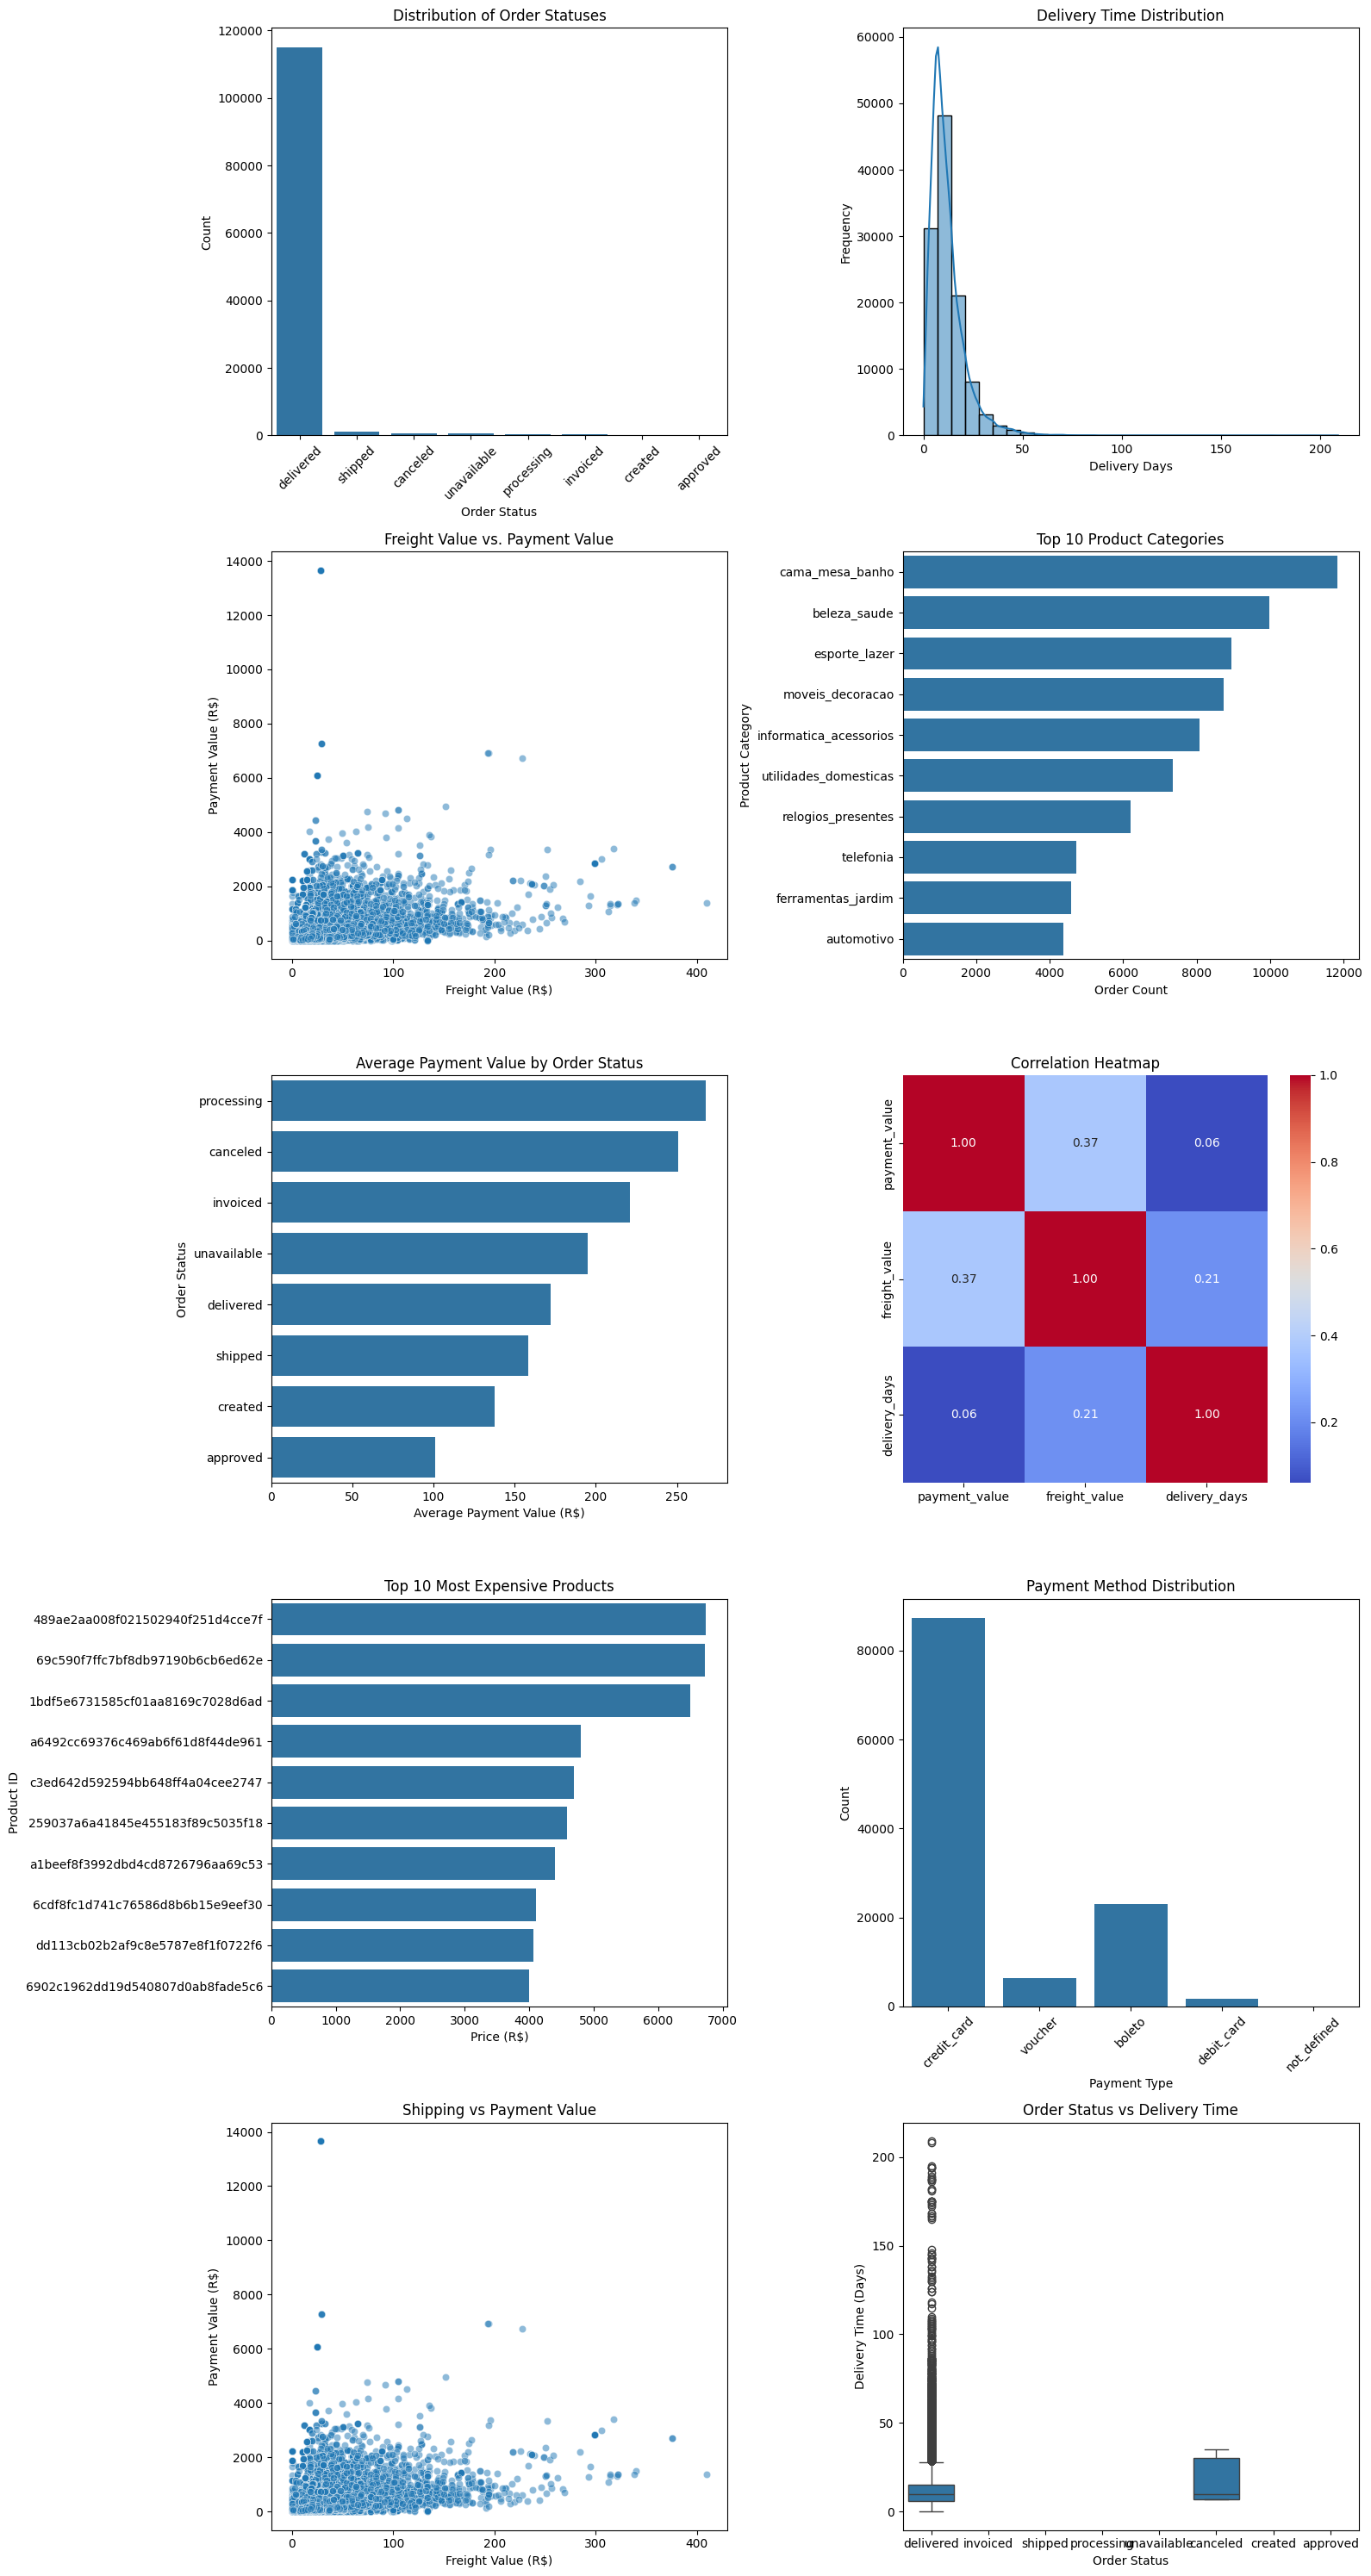

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orders_df = pd.read_csv('/olist_order_dataset/olist_orders_dataset.csv')
shipping_df = pd.read_csv('/olist_order_dataset/olist_order_items_dataset.csv')
payments_df = pd.read_csv('/olist_order_dataset/olist_order_payments_dataset.csv')
products_df = pd.read_csv('/olist_order_dataset/olist_products_dataset.csv')

# Merge datasets into final_order_df
order_shipping_df = pd.merge(orders_df, shipping_df, on='order_id', how='left')
order_payment_df = pd.merge(order_shipping_df, payments_df, on='order_id', how='left')
final_order_df = pd.merge(order_payment_df, products_df, on='product_id', how='left')

# Ensure datetime columns are properly formatted
final_order_df['order_purchase_timestamp'] = pd.to_datetime(final_order_df['order_purchase_timestamp'])
final_order_df['order_delivered_customer_date'] = pd.to_datetime(final_order_df['order_delivered_customer_date'])

# Calculate delivery time
final_order_df['delivery_days'] = (final_order_df['order_delivered_customer_date'] - final_order_df['order_purchase_timestamp']).dt.days

# Create subplots with a 5x2 grid
fig, axs = plt.subplots(5, 2, figsize=(16, 30))

# Plot 1: Order Status Count
sns.countplot(data=final_order_df, x='order_status', ax=axs[0, 0],
              order=final_order_df['order_status'].value_counts().index)
axs[0, 0].set_title("Distribution of Order Statuses")
axs[0, 0].set_xlabel("Order Status")
axs[0, 0].set_ylabel("Count")
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Delivery Days Histogram
sns.histplot(final_order_df['delivery_days'].dropna(), bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title("Delivery Time Distribution")
axs[0, 1].set_xlabel("Delivery Days")
axs[0, 1].set_ylabel("Frequency")

# Plot 3: Freight vs Payment Value
sns.scatterplot(data=final_order_df, x='freight_value', y='payment_value', ax=axs[1, 0], alpha=0.5)
axs[1, 0].set_title("Freight Value vs. Payment Value")
axs[1, 0].set_xlabel("Freight Value (R$)")
axs[1, 0].set_ylabel("Payment Value (R$)")

# Plot 4: Top 10 Product Categories
top_categories = final_order_df['product_category_name'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, ax=axs[1, 1])
axs[1, 1].set_title("Top 10 Product Categories")
axs[1, 1].set_xlabel("Order Count")
axs[1, 1].set_ylabel("Product Category")

# Plot 5: Average Payment Value by Order Status
avg_payment_by_status = final_order_df.groupby('order_status')['payment_value'].mean().sort_values(ascending=False)
sns.barplot(x=avg_payment_by_status.values, y=avg_payment_by_status.index, ax=axs[2, 0])
axs[2, 0].set_title("Average Payment Value by Order Status")
axs[2, 0].set_xlabel("Average Payment Value (R$)")
axs[2, 0].set_ylabel("Order Status")

# Plot 6: Correlation Heatmap
correlation_matrix = final_order_df[['payment_value', 'freight_value', 'delivery_days']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axs[2, 1])
axs[2, 1].set_title("Correlation Heatmap")

# Plot 7: Top 10 Most Expensive Products
top_expensive_products = final_order_df.groupby('product_id')['price'].max().nlargest(10)
sns.barplot(x=top_expensive_products.values, y=top_expensive_products.index, ax=axs[3, 0])
axs[3, 0].set_title("Top 10 Most Expensive Products")
axs[3, 0].set_xlabel("Price (R$)")
axs[3, 0].set_ylabel("Product ID")

# Plot 8: Payment Method Distribution
sns.countplot(data=final_order_df, x='payment_type', ax=axs[3, 1])
axs[3, 1].set_title("Payment Method Distribution")
axs[3, 1].set_xlabel("Payment Type")
axs[3, 1].set_ylabel("Count")
axs[3, 1].tick_params(axis='x', rotation=45)

# Plot 9: Shipping vs Payment Value
sns.scatterplot(data=final_order_df, x='freight_value', y='payment_value', ax=axs[4, 0], alpha=0.5)
axs[4, 0].set_title("Shipping vs Payment Value")
axs[4, 0].set_xlabel("Freight Value (R$)")
axs[4, 0].set_ylabel("Payment Value (R$)")

# Plot 10: Order Status vs Delivery Time (Boxplot)
sns.boxplot(data=final_order_df, x='order_status', y='delivery_days', ax=axs[4, 1])
axs[4, 1].set_title("Order Status vs Delivery Time")
axs[4, 1].set_xlabel("Order Status")
axs[4, 1].set_ylabel("Delivery Time (Days)")

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML

# Load datasets
orders_df = pd.read_csv('/content/drive/MyDrive/olist_order_dataset/olist_orders_dataset.csv')
shipping_df = pd.read_csv('/content/drive/MyDrive/olist_order_dataset/olist_order_items_dataset.csv')
payments_df = pd.read_csv('/content/drive/MyDrive/olist_order_dataset/olist_order_payments_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/olist_order_dataset/olist_products_dataset.csv')

# Merge datasets
order_shipping_df = pd.merge(orders_df, shipping_df, on='order_id', how='left')
order_payment_df = pd.merge(order_shipping_df, payments_df, on='order_id', how='left')
order_full_df = pd.merge(order_payment_df, products_df, on='product_id', how='left')

# Add simulated return and replacement columns if missing
if 'return' not in order_full_df.columns:
    order_full_df['return'] = 'not requested'
if 'replacement' not in order_full_df.columns:
    order_full_df['replacement'] = 'not requested'


output_box = widgets.Output()

# Main chatbot logic
print("Welcome to Flipkart Customer Support")

def run_chatbot():
    order_id_input = widgets.Text(description='Order ID:')
    action_dropdown = widgets.Dropdown(
        options=['Track Order', 'Refund', 'Return', 'Replacement'],
        description='Action:',
    )
    submit_button = widgets.Button(description="Submit", button_style='success')
    continue_button = widgets.Button(description="Need More Help?", button_style='info')
    exit_button = widgets.Button(description="Exit", button_style='danger')

    def handle_submit(b):
        with output_box:
            clear_output()
            order_id = order_id_input.value.strip()
            action = action_dropdown.value

            print("Order ID:", order_id)
            print("Selected Action:", action)

            if order_id not in order_full_df['order_id'].values:
                print(f"⚠️ Sorry, order ID '{order_id}' not found.")
                return

            order_data = order_full_df[order_full_df['order_id'] == order_id]

            # Product details
            product_id = order_data['product_id'].values[0]
            category = order_data['product_category_name'].values[0]
            price = order_data['price'].values[0]
            freight = order_data['freight_value'].values[0]

            print(f"Order ID: {order_id}")
            print(f"Product ID: {product_id}")
            print(f"Category: {category}")
            print(f"Price: ₹{price}")
            print(f"Shipping Fee: ₹{freight}")

            if action == 'Track Order':
                print("Current order status is:", order_data['order_status'].values[0])

            elif action == 'Refund':
                refund = order_data['payment_value'].values[0]
                print("Refund Amount: ₹" + str(refund))

            elif action == 'Return':
                current_status = order_data['return'].values[0]
                print("Return Status:", current_status)
                if isinstance(current_status, str) and current_status.lower() == 'requested':
                    print("Your return request is already in progress.")
                else:
                    print("Return request submitted successfully! Our team will contact you soon.")

            elif action == 'Replacement':
                status = order_data['replacement'].values[0]
                print("Replacement Status:", status)
                if isinstance(status, str) and status.lower() == 'requested':
                    print("Your replacement request is already in progress.")
                else:
                    print("Replacement request submitted successfully! We'll ship your item soon.")

            print("Do you need any more help?")
            display(widgets.HBox([continue_button, exit_button]))

    def handle_continue(b):
        clear_output()
        run_chatbot()

    def handle_exit(b):
        clear_output()
        print("Thank you for contacting Flipkart Support. Have a great day!")

    submit_button.on_click(handle_submit)
    continue_button.on_click(handle_continue)
    exit_button.on_click(handle_exit)

    display(order_id_input, action_dropdown, submit_button, output_box)

# Start chatbot
run_chatbot()


Text(value='', description='Order ID:')

Dropdown(description='Action:', options=('Track Order', 'Refund', 'Return', 'Replacement'), value='Track Order…

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()